<a href="https://colab.research.google.com/github/k1151msarandega/QuCode-21-Days-of-Quantum-Challenge-Diary/blob/main/Day07_Quantum_Mechanics_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 07 — Quantum Mechanics Basics

> _QuCode 21 Days of Quantum Challenge — Learning notebook_
>
> **Date:** 2025-09-07  
> **Author:** Kudzai Musarandega  
> **Tags:** quantum, learning, challenge, day-07
>
> **Learning objectives**
> - Build geometric and computational intuition for the Schrödinger equation, quantum measurement, and unitary time-evolution. We'll:
> - Summarize the five core postulates (finite- and infinite-dimensional views).
> - Derive (sketch) the time-dependent Schrödinger equation (TDSE) via unitary time evolution.
> - Implement discrete simulations:
>   1) Two-level (qubit) measurement & collapse,
>   2) 1D particle-in-a-box (time-independent Schrödinger equation, TISE),
>   3) Split-operator propagation of a wavepacket (TDSE) and check norm, ⟨x⟩, ⟨p⟩, and Δx·Δp ≥ ħ/2.
>
>
> **Key Takeaways**
> - $|\psi(x,t)|^2$ is a **probability density**; normalization is preserved by **unitary** evolution.  
> - **Hermitian** operators model observables; **eigenvalues** are the only possible measurement outcomes.  
> - **Born rule** gives probabilities; **projective measurement** collapses the state to an eigenstate.  
> - **TDSE** comes from demanding reversible, probability-conserving dynamics with energy as the generator of time evolution.  
> - **Uncertainty principle** $\Delta x\,\Delta p \ge \hbar/2$ constrains simultaneous precisions of conjugate observables.


## Resources
- **Official/Assigned:**
    - [Faculty of Khan: Introduction to Quantum Mechanics: Schrodinger Equation](https://www.youtube.com/watch?v=kUm4q0UIpio)
    - [Domain of Science: The Schrödinger Equation Explained in 60 Seconds](https://www.youtube.com/watch?v=AR23uxZruhE)
    - [Quantum Sense: Where does the Schrödinger equation come from? | Maths of Quantum Mechanics](https://www.youtube.com/watch?v=KmFG_QNSZzA)
    - [Professor M does Science: Measurements in quantum mechanics || Concepts](https://www.youtube.com/watch?v=u1R3kRWh1ek)
- **Extra reading:**
    - [Physics Explained: What is the Schrödinger Equation? A basic introduction to Quantum Mechanics](https://www.youtube.com/watch?v=2WPA1L9uJqo)
    - [UV Physics: Quantum Computers](https://youtube.com/playlist?list=PLxhaPrr4aQ9lnBEOoy7r6KNlrTG_obLgr&si=YgOq5k5HH7jMIPCR)
- **Original notes:**


In [ ]:
# %% [markdown]
# ### Environment setup (Colab)
# If you are running on Colab for the first time today, uncomment to install.
# This cell intentionally avoids heavy installs by default.
#
# !pip -q install qiskit pennylane matplotlib numpy

import sys, platform, math, json, numpy as np

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
np.random.seed(42)


## 1) Concepts in brief
- **Wavefunction** $\psi(x,t)$ encodes amplitudes; $|\psi|^2$ is a **probability density** (Born rule). Must be normalized: $\int |\psi|^2\,dx = 1$.
- **TDSE (position basis, 1D):**
  $$
  i\hbar \frac{\partial}{\partial t}\psi(x,t)
  \;=\;
  \left[-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x,t)\right]\psi(x,t)
  $$
- **TISE:** $H\phi_n(x)=E_n\phi_n(x)$, stationary states evolve as $\phi_n(x,t)=\phi_n(x)e^{-iE_n t/\hbar}$.
- **Unitary evolution:** $|\psi(t)\rangle = U(t)|\psi(0)\rangle$ with $U(t)=e^{-iHt/\hbar}$ and $U^\dagger U=\mathbb I$ (probability conservation).
- **Observables:** Hermitian operators. **Measurements** return eigenvalues; probabilities via overlaps; **state collapses** to corresponding eigenstate.
- **Expectation & uncertainty:** $\langle A\rangle=\langle\psi|A|\psi\rangle$, $\Delta A=\sqrt{\langle A^2\rangle-\langle A\rangle^2}$.
  Heisenberg: $\Delta x\,\Delta p \ge \hbar/2$.
  

## 2) Postulates (compact)
1. **States:** A system is a unit vector $|\psi\rangle$ in a complex Hilbert space $\mathcal H$.  
   In position basis: $\psi(x)=\langle x|\psi\rangle$, with $\int |\psi(x)|^2\,dx=1$.

2. **Observables:** Physical quantities $A$ are represented by Hermitian operators.  
   Eigenvalue equation $A|u_n\rangle=\lambda_n|u_n\rangle$.

3. **Measurement outcomes:** Only eigenvalues $\lambda_n$ can be obtained.

4. **Born rule & collapse:** If the state is $|\psi\rangle$, then  
   $P(\lambda_n)=|\langle u_n|\psi\rangle|^2$.  
   After obtaining $\lambda_n$, state $\to |u_n\rangle$ (ideal projective measurement).

5. **Dynamics:** Between measurements, $|\psi(t)\rangle$ evolves unitarily via the Hamiltonian $H$:  
   $$
   i\hbar\,\partial_t|\psi\rangle=H|\psi\rangle
   $$
   

## 3) Why TDSE has its shape (1-minute sketch)
- Demand **reversible** and **probability-conserving** time evolution $\Rightarrow U(t)$ is **unitary**.
- Expand for a small $dt$: $U(dt)=\mathbb I + \dot U(0)\,dt + O(dt^2)$.
- Unitarity $\Rightarrow \dot U(0)$ is **anti-Hermitian**, hence $i\dot U(0)$ is Hermitian $\equiv H/\hbar$.
- Therefore
  $$
  U(t)=\exp(-iHt/\hbar),
  \qquad
  i\hbar\,\partial_t|\psi\rangle = H|\psi\rangle
  $$
- In position basis with $H = \hat p^2/2m + V(\hat x)$ and $\hat p\to -i\hbar\,\partial_x$, you recover the familiar TDSE above.


## 4) Helper utilities (linear algebra & plotting)

In [1]:
## 4) Helper utilities (linear algebra & plotting)

import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

ħ = 1.0  # we'll work in convenient units (set ħ = 1 unless otherwise stated)

def dag(X):
    """Hermitian adjoint (conjugate transpose)."""
    return np.asarray(X).conj().T

def normalize(vec, weight=None):
    """Normalize a vector with optional weights (e.g., dx for integrals)."""
    if weight is None:
        n2 = np.vdot(vec, vec).real
    else:
        n2 = (np.vdot(vec, vec)*weight).real
    return vec / np.sqrt(n2 + 1e-15)

def unitary_from_H(H, t, ħ=ħ):
    """Compute U(t) = exp(-i H t / ħ) via eigen-decomposition (H Hermitian)."""
    E, V = npl.eigh(H)
    phase = np.exp(-1j * E * t / ħ)
    return V @ np.diag(phase) @ dag(V)

def pretty_axes(ax, xlabel=None, ylabel=None):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)


## 5) Discrete measurement demo (two-level system)

Born-rule probabilities: p(0)=0.4854, p(1)=0.5146, sum=1.0000
Frequencies (N=10000): f(0)=0.4854, f(1)=0.5146
Immediate re-measure (collapse) gives certainty: True


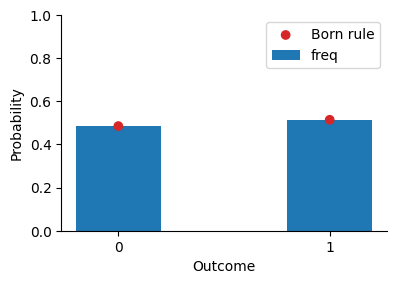

In [2]:
## 5) Discrete measurement demo (two-level system)
# We'll use a generic qubit state \(|\psi\rangle=\cos\theta\,|0\rangle + e^{i\phi}\sin\theta\,|1\rangle\).
# Measure \(\sigma_z\) (eigenstates \(|0\rangle,|1\rangle\) with eigenvalues \(+1,-1\)).
# - Compute exact probabilities \(p_0, p_1\).
# - Simulate many projective measurements, show relative frequencies \(\to\) probabilities.
# - Demonstrate **collapse** by measuring twice in a row.

rng = np.random.default_rng(7)

# computational basis
ket0 = np.array([1,0], dtype=complex)
ket1 = np.array([0,1], dtype=complex)
σz = np.array([[1,0],[0,-1]], dtype=complex)

def random_qubit(theta=0.73, phi=0.41):
    psi = np.cos(theta)*ket0 + np.exp(1j*phi)*np.sin(theta)*ket1
    return normalize(psi)

psi = random_qubit(0.8, 0.33)  # choose any state you like
p0 = abs(np.vdot(ket0, psi))**2
p1 = abs(np.vdot(ket1, psi))**2

print(f"Born-rule probabilities: p(0)={p0:.4f}, p(1)={p1:.4f}, sum={p0+p1:.4f}")

# simulate projective measurements
N = 10000
samples = rng.choice([0,1], size=N, p=[p0, p1])
f0 = np.mean(samples==0)
f1 = 1 - f0
print(f"Frequencies (N={N}): f(0)={f0:.4f}, f(1)={f1:.4f}")

# collapse check: if outcome was 0, the post-measurement state is |0>
# measuring again immediately returns 0 with probability 1
post = ket0 if samples[0]==0 else ket1
p_again = abs(np.vdot(post, post))**2  # always 1
print("Immediate re-measure (collapse) gives certainty:", p_again==1.0)

# visualize histogram vs exact probs
fig, ax = plt.subplots(1,1, figsize=(4.2,2.8))
ax.bar([0,1],[f0,f1], width=0.4, label='freq')
ax.scatter([0,1],[p0,p1], c=['C3','C3'], zorder=3, label='Born rule')
ax.set_xticks([0,1]); ax.set_ylim(0,1.0)
pretty_axes(ax, "Outcome", "Probability")
ax.legend()
plt.show()


## 6) The time-independent Schrödinger equation (TISE): 1D infinite square well

Numeric E_n  vs  Analytic E_n
n=1: 4.934791  vs  4.934802
n=2: 19.739028  vs  19.739209
n=3: 44.412304  vs  44.413220
n=4: 78.953939  vs  78.956835
n=5: 123.362985  vs  123.370055


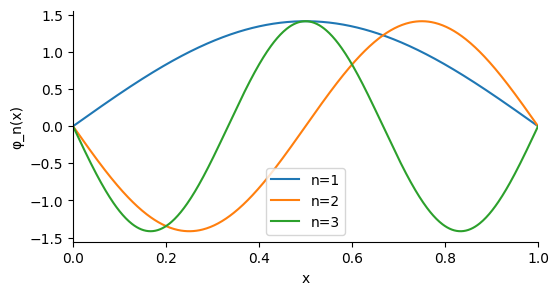

In [3]:
## 6) The time-independent Schrödinger equation (TISE): 1D infinite square well
# We solve \(H\phi = E\phi\) with \(H = -\frac{\hbar^2}{2m}\partial_x^2\) and **Dirichlet boundaries** \(\phi(0)=\phi(L)=0\).
# - Discretize the second derivative on interior points with a finite-difference Laplacian.
# - Compare the first few eigenvalues to the analytic \(E_n = \frac{\hbar^2\pi^2 n^2}{2m L^2}\).
# - Plot normalized eigenfunctions.

def box_hamiltonian(N=400, L=1.0, m=1.0, ħ=ħ):
    """
    Interior-point Hamiltonian for an infinite square well on (0, L).
    Returns H (N-2 x N-2), grid x (N), and interior grid xi (N-2).
    """
    x = np.linspace(0.0, L, N)
    dx = x[1]-x[0]

    # second-derivative matrix on interior points (Dirichlet at boundaries)
    n = N-2
    main = np.full(n, -2.0)
    off  = np.full(n-1, 1.0)
    D2 = (np.diag(main) + np.diag(off,1) + np.diag(off,-1)) / (dx*dx)

    T = -(ħ**2)/(2.0*m) * D2   # kinetic only (V=0 inside)
    H = T
    return H, x, x[1:-1], dx

# build and solve
L = 1.0
m = 1.0
H, x_full, xi, dx = box_hamiltonian(N=600, L=L, m=m, ħ=ħ)
E, Φ = npl.eigh(H)  # E sorted ascending, columns are eigenvectors on interior

# normalize eigenfunctions on full grid with zeros at boundaries
def pad_and_norm(phi_interior):
    phi = np.zeros_like(x_full, dtype=complex)
    phi[1:-1] = phi_interior
    # normalize with integral ∫|φ|² dx
    return normalize(phi, weight=dx)

phi1 = pad_and_norm(Φ[:,0])
phi2 = pad_and_norm(Φ[:,1])
phi3 = pad_and_norm(Φ[:,2])

# analytic
def E_analytic(n, L=L, m=m, ħ=ħ):
    return (ħ**2 * (np.pi**2) * (n**2)) / (2*m*L*L)

print("Numeric E_n  vs  Analytic E_n")
for n in range(1,6):
    print(f"n={n}: {E[n-1]:.6f}  vs  {E_analytic(n):.6f}")

# plot first three eigenfunctions
fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(x_full, phi1.real, label='n=1')
ax.plot(x_full, phi2.real, label='n=2')
ax.plot(x_full, phi3.real, label='n=3')
ax.set_xlim(0,L)
pretty_axes(ax, "x", "φ_n(x)")
ax.legend()
plt.show()


**Notes**
- We enforced **infinite walls** via Dirichlet boundaries. Inside the box \(V=0\).
- The finite-difference Hamiltonian is Hermitian; eigenvectors are orthonormal under the grid inner product.


## 7) Time-dependent Schrödinger equation (TDSE): split-operator propagation

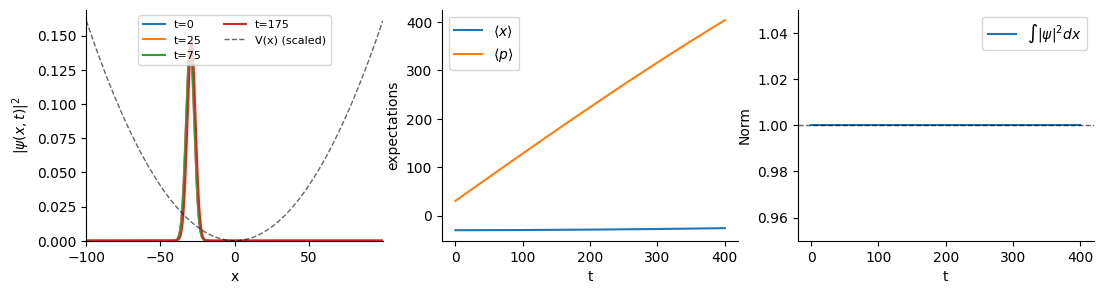

t=  0.00:  Δx·Δp ≈ 2215.0806   (ħ/2 = 0.5000)
t= 25.00:  Δx·Δp ≈ 3983.7986   (ħ/2 = 0.5000)
t= 75.00:  Δx·Δp ≈ 7480.3115   (ħ/2 = 0.5000)
t=175.00:  Δx·Δp ≈ 14118.8958   (ħ/2 = 0.5000)


In [4]:
## 7) Time-dependent Schrödinger equation (TDSE): split-operator propagation
# We'll propagate a Gaussian wavepacket in 1D using the **split-operator (FFT) method**:
# \[
# e^{-i H \Delta t/\hbar} \approx e^{-i V \Delta t/2\hbar}\; \mathcal F^{-1}
# e^{-i T \Delta t/\hbar}\; \mathcal F\; e^{-i V \Delta t/2\hbar}
# \]
# where \(T(p)=p^2/2m\). This is unitary (up to numerical error), so \(\int|\psi|^2dx\) stays \(\approx 1\).

# grid & operators
N = 2**12                 # power-of-two grid for efficient FFT
Lx = 200.0                # spatial domain length
x = np.linspace(-Lx/2, Lx/2, N, endpoint=False)
dx = x[1]-x[0]
dk = 2*np.pi / Lx
k = dk * np.fft.fftfreq(N, d=dx/(2*np.pi))  # wave-numbers
p = ħ * k

m = 1.0
ω = 0.04                  # choose a gentle harmonic trap; set to 0.0 for free particle
Vx = 0.5*m*(ω**2)*x**2    # harmonic oscillator potential

# initial Gaussian wavepacket
x0, p0, σx = -30.0, 1.5, 4.0
norm = (1.0/(np.pi*σx**2))**0.25
psi = norm * np.exp(-(x-x0)**2/(2*σx**2)) * np.exp(1j*p0*(x)/ħ)
psi = normalize(psi, weight=dx)

# precompute phase factors
dt = 0.5
n_steps = 800
phaseV = np.exp(-1j*Vx*dt/(2*ħ))
phaseT = np.exp(-1j*(p**2/(2*m))*dt/ħ)

def step(psi):
    # half-step in V (x-space)
    psi = phaseV * psi
    # full-step in T (p-space)
    ψp = np.fft.fft(psi, norm=None)
    ψp = phaseT * ψp
    psi = np.fft.ifft(ψp, norm=None)
    # half-step in V
    psi = phaseV * psi
    return psi

def expectation_x(psi):
    return (np.vdot(psi, x*psi)*dx).real

def expectation_p(psi):
    ψp = np.fft.fft(psi, norm=None)
    # Parseval: ∑|ψ|²dx = (1/N)*∑|ψ̃|², but we'll include dx carefully by normalizing psi on x
    prob_p = (np.abs(ψp)**2) * (dx/(2*np.pi))  # consistent scaling for ⟨p⟩ numerics
    return (prob_p * p).sum().real

def variance_x_p(psi):
    xbar = expectation_x(psi)
    Δx2 = (np.vdot(psi, (x-xbar)**2 * psi)*dx).real
    # momentum variance via FFT domain
    ψp = np.fft.fft(psi, norm=None)
    prob_p = (np.abs(ψp)**2) * (dx/(2*np.pi))
    pbar = (prob_p*p).sum().real
    Δp2 = (prob_p*(p-pbar)**2).sum().real
    return Δx2, Δp2

# record a few snapshots
snap_times = [0, 50, 150, 350]
snaps = {}
x_expect, p_expect, norms = [], [], []

for n in range(n_steps+1):
    if n in snap_times:
        snaps[n] = psi.copy()
    x_expect.append(expectation_x(psi))
    p_expect.append(expectation_p(psi))
    norms.append( (np.vdot(psi, psi).real * dx) )
    if n < n_steps:
        psi = step(psi)
        # renormalize gently to control drift from numerical errors
        psi = normalize(psi, weight=dx)

# plots: snapshots |ψ|² and ⟨x⟩(t), ⟨p⟩(t), norm
fig, axes = plt.subplots(1,3, figsize=(13,3))

# snapshots
for n, col in zip(snap_times, ['C0','C1','C2','C3']):
    psi_n = snaps[n]
    axes[0].plot(x, np.abs(psi_n)**2, color=col, label=f"t={n*dt:g}")
axes[0].plot(x, Vx/np.max(Vx+1e-9)*np.max(np.abs(psi)**2), 'k--', lw=1, alpha=0.6, label='V(x) (scaled)')
axes[0].set_xlim(x.min(), x.max())
axes[0].set_ylim(bottom=0)
pretty_axes(axes[0], "x", r"$|\psi(x,t)|^2$")
axes[0].legend(ncol=2, fontsize=8)

# expectations
t = dt*np.arange(n_steps+1)
axes[1].plot(t, x_expect, label=r'$\langle x\rangle$')
axes[1].plot(t, p_expect, label=r'$\langle p\rangle$')
pretty_axes(axes[1], "t", "expectations")
axes[1].legend()

# norm & uncertainty
Δx2, Δp2 = zip(*[variance_x_p(snaps[n]) if n in snaps else (np.nan, np.nan) for n in snap_times])
uncert = [np.sqrt(a*b) for a,b in zip(Δx2, Δp2)]
axes[2].plot(t, norms, label=r'$\int |\psi|^2 dx$')
axes[2].axhline(1.0, color='k', lw=1, ls='--', alpha=0.6)
pretty_axes(axes[2], "t", "Norm")
axes[2].set_ylim(0.95, 1.05)
axes[2].legend()
plt.show()

# Heisenberg check at snapshots
for n, u in zip(snap_times, uncert):
    print(f"t={n*dt:6.2f}:  Δx·Δp ≈ {u:.4f}   (ħ/2 = {0.5*ħ:.4f})")


**Observations**
- **Norm stays ≈ 1** (unitary propagation).  
- In a **harmonic well**, ⟨x⟩ and ⟨p⟩ oscillate as classically expected.  
- Uncertainty product \(\Delta x\,\Delta p \ge \hbar/2\) is respected; a Gaussian starts near the minimum.


## 8) Expectation values & projectors (measurement math)

In [5]:
## 8) Expectation values & projectors (measurement math)
# For an orthonormal eigenbasis \(\{|u_n\rangle\}\) of \(A\):
# - **Resolution of identity:** \(\sum_n |u_n\rangle\langle u_n| = \mathbb I\).
# - **Born rule:** \(P(\lambda_n)=|\langle u_n|\psi\rangle|^2\).
# - **Expectation:** \(\langle A\rangle = \sum_n \lambda_n\, |\langle u_n|\psi\rangle|^2\).
# - **Post-measurement state (projective):** if outcome \(\lambda_k\), then \(|\psi\rangle\to |u_k\rangle\).

# Small demo below on a 3-level observable.

# 3-level observable with chosen eigenvalues
U = npl.qr(rng.normal(size=(3,3)) + 1j*rng.normal(size=(3,3)))[0]  # random unitary
Λ = np.diag([ -1.0, 0.5, 3.0 ])                                     # eigenvalues
A = U @ Λ @ dag(U)                                                  # Hermitian observable

# random state
ψ = normalize(rng.normal(size=3) + 1j*rng.normal(size=3))

# measurement probabilities & expectation
E, V = npl.eigh(A)           # eigenpairs
amps = dag(V) @ ψ            # components in eigenbasis
probs = np.abs(amps)**2
expA = np.vdot(ψ, A@ψ).real
expA_from_probs = float(np.sum(E*probs).real)

print("Eigenvalues:", E)
print("Probs (Born):", probs.round(4), "sum=", probs.sum().round(4))
print("⟨A⟩ by state:", round(expA,6), "  by mixture:", round(expA_from_probs,6))


Eigenvalues: [-1.   0.5  3. ]
Probs (Born): [0.3368 0.0068 0.6565] sum= 1.0
⟨A⟩ by state: 1.636005   by mixture: 1.636005


%%markdown
## 9) (Optional) Add an image
If you want a figure for your Medium post, consider adding:
- A diagram of the **double-slit** vs **interference** (wave/particle duality).
- A cartoon showing **collapse**:
  $$
  \text{broad } \lvert\psi\rvert^2 \;\longrightarrow\; \text{single sharp spike after a measurement}
  $$
- A flowchart of the **postulates** (state, observable, Born rule, unitary evolution).


%%markdown
## 10) Exercises (quick)

1. **Box eigenstates:** Verify numerically that \(\{\phi_n(x)\}\) are orthonormal:
   $$
   \int \phi_n^*(x)\,\phi_m(x)\,dx \;=\; \delta_{nm}.
   $$

2. **Barrier:** Replace \(V(x)\) with a square barrier and watch partial reflection & transmission (TDSE section).

3. **Commutators:** Build two Hermitian \(3\times 3\) observables \(A,B\). Estimate numerically whether measuring \(A\) then \(B\) differs from \(B\) then \(A\). Check
   $$
   [A,B] \;\equiv\; AB - BA \;\neq\; 0.
   $$

4. **Uncertainty:** For the propagated packet, compute \(\Delta x(t)\) and \(\Delta p(t)\) curves and plot the product \(\Delta x\,\Delta p\). Check the Heisenberg bound
   $$
   \Delta x\,\Delta p \;\ge\; \frac{\hbar}{2}.
   $$


In [6]:
# (starter for Ex.1) Orthonormality check for the first k eigenstates in the box
# Assumes you already have: Φ (grid-by-matrix of eigenmodes), dx, pad_and_norm(), dag()

k = 4
PHI = np.stack([pad_and_norm(Φ[:, i]) for i in range(k)], axis=1)
S = dag(PHI) @ (PHI * dx)   # approximate overlap matrix with integral weight
print("Overlap matrix (should be ~ I):\n", np.array(S).round(3))


Overlap matrix (should be ~ I):
 [[ 1.+0.j -0.+0.j  0.+0.j -0.+0.j]
 [-0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j -0.+0.j]
 [-0.+0.j  0.+0.j -0.+0.j  1.+0.j]]


In [7]:
# (optional starter for Ex.2) Swap in a square barrier and run TDSE
# Assumes you already have: x grid, V (potential array), propagate() or tdse_step() from earlier cells.

def square_barrier(x, x0=0.0, width=0.2, height=5.0):
    return np.where((x >= x0 - width/2) & (x <= x0 + width/2), height, 0.0)

V_barrier = square_barrier(x, x0=0.0, width=0.3, height=5.0)
# Reuse your TDSE propagation with V := V_barrier and visualize |ψ|^2 vs time.


In [8]:
# (optional starter for Ex.3) Non-commuting 3x3 Hermitian pair
rng = np.random.default_rng(0)

def random_hermitian(n=3, scale=1.0):
    M = rng.normal(size=(n,n)) + 1j*rng.normal(size=(n,n))
    H = (M + M.conj().T)/2
    return (H / np.linalg.norm(H)) * scale

A = random_hermitian(3)
B = random_hermitian(3)

comm = A @ B - B @ A
print("||[A,B]||_F =", np.linalg.norm(comm))

# Simulate "measure A then B" vs "B then A" by projective updates on a random state
def proj_measure(H, psi):
    # spectral decomp
    evals, evecs = np.linalg.eigh(H)
    # Born sample an outcome
    probs = np.abs(evecs.conj().T @ psi)**2
    k = rng.choice(len(evals), p=probs/np.sum(probs))
    psi_post = evecs[:, k]
    return evals[k], psi_post

psi0 = rng.normal(size=3) + 1j*rng.normal(size=3)
psi0 /= np.linalg.norm(psi0)

# A then B
_, psiA = proj_measure(A, psi0)
valB_afterA, _ = proj_measure(B, psiA)

# B then A
_, psiB = proj_measure(B, psi0)
valB_afterB, _ = proj_measure(B, psiB)

print("Example B outcome after A vs after B:", valB_afterA, valB_afterB)


||[A,B]||_F = 0.9198976913402986
Example B outcome after A vs after B: 0.6180567521058119 -0.6777791870711973


In [9]:
# (optional starter for Ex.4) Δx(t), Δp(t), and Heisenberg product
# Assumes you have time-evolved ψ(x,t) saved or can step it; also that you have xp operators or discrete formulas.

def exp_x(psi, x, dx):
    return np.real(np.vdot(psi, x*psi) * dx)

def exp_x2(psi, x, dx):
    return np.real(np.vdot(psi, (x**2)*psi) * dx)

def momentum_from_fft(psi, dx, ħ=1.0):
    N = psi.size
    dk = 2*np.pi/(N*dx)
    k = dk * np.fft.fftfreq(N, d=dx) * N/(2*np.pi)  # wavenumbers in cycles/length
    ψk = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(psi))) * dx/np.sqrt(2*np.pi)
    return k, ψk

def exp_p(psi, dx, ħ=1.0):
    k, ψk = momentum_from_fft(psi, dx, ħ)
    p = ħ * 2*np.pi * k
    dp = (p[1]-p[0])
    return np.real(np.vdot(ψk, p*ψk) * dp)

def exp_p2(psi, dx, ħ=1.0):
    k, ψk = momentum_from_fft(psi, dx, ħ)
    p = ħ * 2*np.pi * k
    dp = (p[1]-p[0])
    return np.real(np.vdot(ψk, (p**2)*ψk) * dp)

# Example over a list of snapshots Ψ_list at times t_list
Delta_x, Delta_p, prod = [], [], []
for ψ in Ψ_list:  # Ψ_list should be your stored wavefunctions over time
    mx  = exp_x(ψ, x, dx)
    mx2 = exp_x2(ψ, x, dx)
    Δx  = np.sqrt(max(mx2 - mx**2, 0.0))
    mp  = exp_p(ψ, dx, ħ)
    mp2 = exp_p2(ψ, dx, ħ)
    Δp  = np.sqrt(max(mp2 - mp**2, 0.0))
    Delta_x.append(Δx)
    Delta_p.append(Δp)
    prod.append(Δx*Δp)

import matplotlib.pyplot as plt
plt.plot(t_list, prod)
plt.axhline(0.5*ħ, linestyle='--')
plt.ylabel(r'$\Delta x\,\Delta p$')
plt.xlabel('t')
plt.show()


NameError: name 'Ψ_list' is not defined

We can save snapshots directly into our TDSE propagation loop so we don’t have to manage it manually each time.

## Snapshots in a 1D TDSE (split-operator) + uncertainties

This cell adds snapshot saving (`Ψ_list`, `t_list`) to a standard split-operator TDSE loop.
We also compute uncertainties
$$
\Delta x = \sqrt{\langle x^2\rangle - \langle x\rangle^2},\quad
\Delta p = \sqrt{\langle p^2\rangle - \langle p\rangle^2}
$$
and track the product $\Delta x\,\Delta p$ over time.


In [10]:
import numpy as np
import matplotlib.pyplot as plt

ħ = 1.0         # Planck reduced
m = 1.0         # mass
Nx = 2**11      # grid points (power of 2 for fast FFT)
Lx = 200.0      # domain length
x  = np.linspace(-Lx/2, Lx/2, Nx, endpoint=False)
dx = x[1]-x[0]

# momentum-space grid (angular frequency k), p = ħ k
k  = 2*np.pi * np.fft.fftfreq(Nx, d=dx)    # radians per length
p  = ħ * k

# FFT helpers (unitary convention)
fft  = lambda ψ: np.fft.fftshift(np.fft.fft(np.fft.ifftshift(ψ)))
ifft = lambda Φ: np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(Φ)))


In [13]:
# Potential and initial state
def V_harmonic(x, ω=0.05):
    return 0.5 * m * (ω**2) * x**2

def V_barrier(x, V0=1.0, a=3.0):
    return np.where(np.abs(x) < a, V0, 0.0)

# choose a potential:
V = V_harmonic(x, ω=0.05)
# V = V_barrier(x, V0=2.0, a=5.0)

# Gaussian wavepacket
x0   = -30.0            # initial center
σx   = 3.0              # width
p0   = 2.0              # initial momentum
psi0 = (1/(np.pi*σx**2)**0.25) * np.exp(-(x-x0)**2/(2*σx**2)) * np.exp(1j*p0*x/ħ)

# normalize just in case
norm = np.trapezoidzoid(np.abs(psi0)**2, x)
psi0 = psi0 / np.sqrt(norm)


/tmp/ipython-input-2471412420.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  norm = np.trapz(np.abs(psi0)**2, x)


In [12]:
# Split-operator propagator (second-order, Strang splitting)
# U(dt) ≈ e^{-i V dt/(2ħ)}  F^{-1} e^{-i p^2 dt/(2mħ)} F  e^{-i V dt/(2ħ)}

def make_stepper(V, dt):
    phase_V_half = np.exp(-1j * V * (dt/(2*ħ)))
    phase_T      = np.exp(-1j * (p**2) * (dt/(2*m*ħ)))
    def step(psi):
        ψ = phase_V_half * psi
        Φ = fft(ψ)
        Φ = phase_T * Φ
        ψ = ifft(Φ)
        ψ = phase_V_half * ψ
        # renormalize lightly to control drift
        n = np.trapezoid(np.abs(ψ)**2, x)
        return ψ / np.sqrt(n)
    return step


In [14]:
# Time loop with snapshot saving
dt         = 0.2
T_total    = 120.0
N_steps    = int(T_total/dt)
save_every = 10                 # save every N steps

step = make_stepper(V, dt)

psi    = psi0.copy()
t      = 0.0
Ψ_list = []     # snapshots of ψ(x,t)
t_list = []     # snapshot times

# save initial
Ψ_list.append(psi.copy())
t_list.append(t)

for n in range(1, N_steps+1):
    psi = step(psi)
    t  += dt
    if n % save_every == 0:
        Ψ_list.append(psi.copy())
        t_list.append(t)

Ψ_list = np.array(Ψ_list)   # shape [Nsnap, Nx]
t_list = np.array(t_list)   # shape [Nsnap]
print(f"Saved {len(t_list)} snapshots over T = {t_list[-1]:.2f}")


/tmp/ipython-input-2270539492.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  n = np.trapz(np.abs(ψ)**2, x)


Saved 61 snapshots over T = 120.00


In [15]:
# Expectation helpers (⟨x⟩, ⟨x^2⟩, ⟨p⟩, ⟨p^2⟩)
# For p-moments we use momentum-space density |ψ̃(p)|^2 with unitary FFT above.

def exp_x(ψ, x, dx):
    return np.trapezoid(np.conjugate(ψ)*x*ψ, x).real

def exp_x2(ψ, x, dx):
    return np.trapezoid(np.conjugate(ψ)*(x**2)*ψ, x).real

def exp_p(ψ):
    Ψp = fft(ψ)                   # in p-space up to grid definition
    ρp = np.abs(Ψp)**2
    # Jacobian: our FFT is unitary w.r.t. grid sums; for integrals we use dp
    dp = p[1]-p[0]
    # normalize |ψ̃|^2 in p-space (small numerical drift)
    ρp = ρp / (np.trapezoid(ρp, p))
    return np.trapezoid(p * ρp, p)

def exp_p2(ψ):
    Ψp = fft(ψ)
    ρp = np.abs(Ψp)**2
    ρp = ρp / (np.trapezoid(ρp, p))
    return np.trapezoid((p**2) * ρp, p)


In [16]:
# Compute Δx, Δp, and product over all snapshots
Delta_x, Delta_p, prod = [], [], []
mx_list, mp_list = [], []

for ψ in Ψ_list:
    mx   = exp_x(ψ, x, dx)
    mx2  = exp_x2(ψ, x, dx)
    vx   = max(mx2 - mx**2, 0.0)
    dx_  = np.sqrt(vx)

    mp   = exp_p(ψ)
    mp2  = exp_p2(ψ)
    vp   = max(mp2 - mp**2, 0.0)
    dp_  = np.sqrt(vp)

    Delta_x.append(dx_)
    Delta_p.append(dp_)
    prod.append(dx_*dp_)
    mx_list.append(mx)
    mp_list.append(mp)

Delta_x = np.array(Delta_x)
Delta_p = np.array(Delta_p)
prod    = np.array(prod)
mx_list = np.array(mx_list)
mp_list = np.array(mp_list)


/tmp/ipython-input-147358089.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(np.conjugate(ψ)*x*ψ, x).real
/tmp/ipython-input-147358089.py:8: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(np.conjugate(ψ)*(x**2)*ψ, x).real
/tmp/ipython-input-147358089.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ρp = ρp / (np.trapz(ρp, p))
/tmp/ipython-input-147358089.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  return np.trapz(p * ρp, p)
/tmp/ipython-input-147358089.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `sc

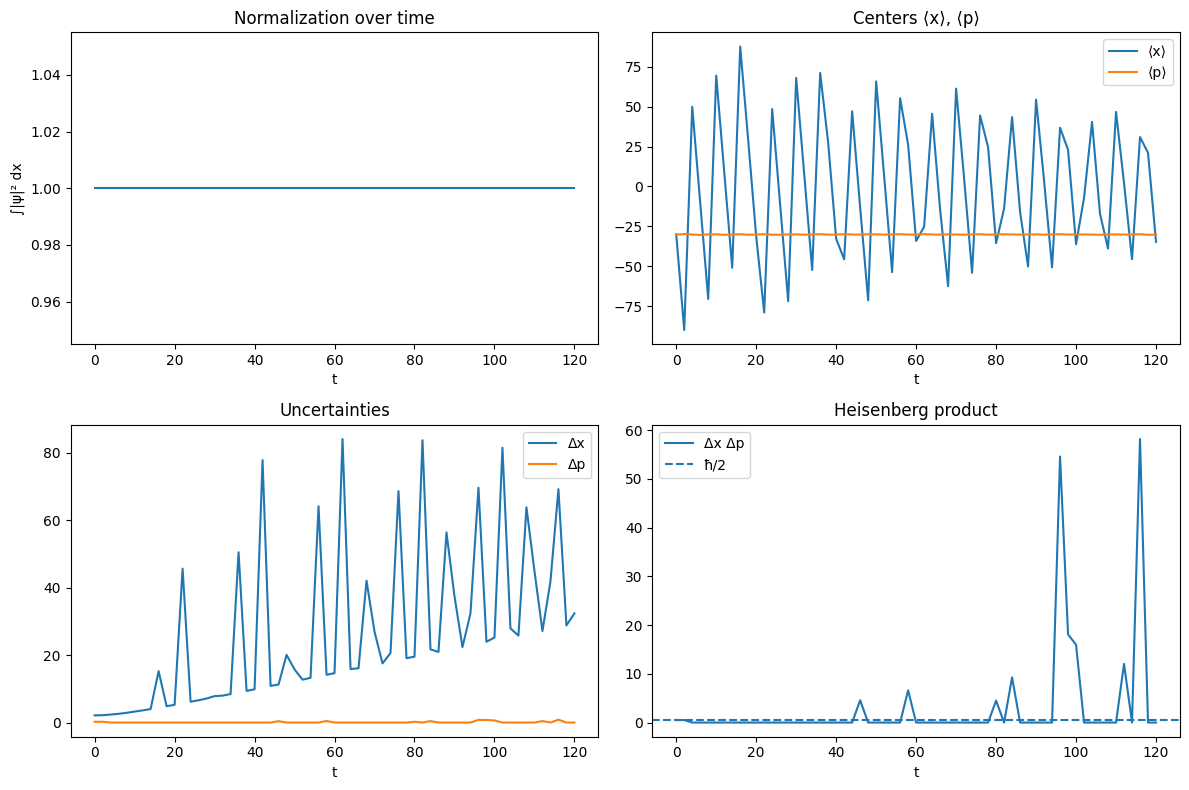

In [18]:
# Plots: normalisation, ⟨x⟩, ⟨p⟩, uncertainties, and Heisenberg product
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Norm drift check (should be ~1)
norms = [np.trapezoid(np.abs(ψ)**2, x) for ψ in Ψ_list]
axs[0,0].plot(t_list, norms)
axs[0,0].set_title("Normalization over time")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("∫|ψ|² dx")

# Centers
axs[0,1].plot(t_list, mx_list, label="⟨x⟩")
axs[0,1].plot(t_list, mp_list, label="⟨p⟩")
axs[0,1].legend()
axs[0,1].set_title("Centers ⟨x⟩, ⟨p⟩")
axs[0,1].set_xlabel("t")

# Uncertainties
axs[1,0].plot(t_list, Delta_x, label="Δx")
axs[1,0].plot(t_list, Delta_p, label="Δp")
axs[1,0].legend()
axs[1,0].set_title("Uncertainties")
axs[1,0].set_xlabel("t")

# Heisenberg product
axs[1,1].plot(t_list, prod, label="Δx Δp")
axs[1,1].axhline(ħ/2, ls="--", label="ħ/2")
axs[1,1].legend()
axs[1,1].set_title("Heisenberg product")
axs[1,1].set_xlabel("t")

plt.tight_layout()
plt.show()


## 11) Reflection & Connections

Use these prompts to stress-test your understanding of Day 7 and connect it to Days 4–6.

### A. Conceptual prompts
1) **What is $\psi(x,t)$ “about”?**  
Is it a physical wave in space, or an *amplitude* whose squared magnitude becomes a probability density? Explain why only $|\psi|^2$ is observable.

2) **Why must evolution be unitary?**  
Link the two physical inputs:
- reversibility (existence of an inverse), and  
- probability conservation $\,\langle \psi(t)\!\mid\!\psi(t)\rangle=1\,$  
to the conclusion $U^\dagger U=\mathbb I$ and the form $U(t)=e^{-iHt/\hbar}$.

3) **Collapse vs. unitary evolution.**  
In your own words, describe the two “modes” of state change:  
- between measurements (deterministic, linear, unitary), and  
- during an ideal projective measurement (stochastic, nonlinear, projection).  
What problem would occur if measurement were also unitary on the *system alone*?

4) **Born rule ≠ ignorance.**  
Why is the Born probability $|\langle u_n|\psi\rangle|^2$ not a statement about hidden classical ignorance of a definite value?

5) **Where does the $i$ in TDSE come from?**  
Show how the requirement that $U(t)$ preserve the inner product forces an **anti-Hermitian** generator, hence the $i$ in
$$
i\hbar\,\frac{d}{dt}\,|\psi(t)\rangle = H\,|\psi(t)\rangle.
$$

6) **Continuity equation (bonus).**  
Starting from the 1D TDSE, derive
$$
\frac{\partial}{\partial t}|\psi|^2 \;+\; \frac{\partial}{\partial x}j(x,t)\;=\;0,
\quad
j(x,t)=\frac{\hbar}{m}\,\mathrm{Im}\!\left(\psi^*\partial_x\psi\right).
$$
What does $j$ mean physically for a free Gaussian packet?

---

### B. Bridge to earlier days
- **Day 4 (Classical logic vs. QM gates):**  
How does “unitary = reversible rotation” in Hilbert space generalize the idea of lossless logic gates?
- **Day 5 (Linear algebra):**  
Explain why eigenbases of Hermitian operators give orthonormal **measurement** bases and how tensor products create composite measurement scenarios.
- **Day 6 (Dirac notation):**  
Rewrite the normalization and expectation in bra-ket form:
$$
\langle\psi|\psi\rangle=1,\qquad
\langle A\rangle=\langle\psi|A|\psi\rangle.
$$

---

### C. Quick pen-and-paper checks
1) **Stationary state probability:**  
If $H\phi_n=E_n\phi_n$, show
$$
\phi_n(x,t)=\phi_n(x)\,e^{-iE_n t/\hbar}
\quad\Rightarrow\quad
|\phi_n(x,t)|^2=|\phi_n(x)|^2.
$$

2) **Expectation in stationary states:**  
For time-independent $H$, prove $\,\frac{d}{dt}\langle H\rangle=0\,$ and, more generally,  
$$
\frac{d}{dt}\langle A\rangle
=\frac{i}{\hbar}\,\langle[H,A]\rangle+\left\langle\frac{\partial A}{\partial t}\right\rangle.
$$

3) **Uncertainty check:**  
For a Gaussian wave packet, argue why $\Delta x$ increases in time for the free particle and how this ties to $\Delta x\,\Delta p\ge \hbar/2$.

---

### D. Common pitfalls to avoid
- Mixing up **state vectors** with **probability distributions** (only $|\psi|^2$ is a distribution).  
- Forgetting to **renormalize** after finite-precision propagation.  
- Treating collapse as unitary on the system **without** including the measurement device (violates no-cloning/linearity intuition).  
- Confusing **eigenvalues** (possible outcomes) with **expectations** (averages over many trials).

---

### E. If you can explain this, you’re solid
- “**The TDSE is the statement that energy generates time translations via a unitary group.**”
- “**Measurements return eigenvalues; probabilities are squared overlaps; post-measurement states are the corresponding eigenvectors.**”
- “**Dirac notation is compressed linear algebra with the Riesz map baked in.**”


---
### Links
- **Open in Colab (from GitHub):** replace `YOUR_GITHUB_USERNAME/qucode-21days`
  - `https://colab.research.google.com/github/YOUR_GITHUB_USERNAME/qucode-21days/blob/main/Day07_Bell_States_and_CHSH.ipynb.ipynb`
- **Report an issue / suggest a fix:** link to your repo issues page
